## Credits to Jorge Yanar, Zijian Jiang, and the previous year's bootcamp organizers for making these exercises!

# linear algebra module, afternoon problems

## PNI Bootcamp 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set_context("notebook")

# A nice helper function we can use to visualize vectors:

def plot_vectors(vectors, labels=None, arrow_kwargs=None):
    """
    Plot multiple 2D vectors.

    Parameters
    ----------
    vectors : list[np.ndarray]
        List of 2D vectors to be plotted.
    labels : list[str], optional
        List of labels for each vector. If None, default labels will be used.
    arrow_kwargs : dict, optional
        Additional keyword arguments for plt.arrow().
    """
    # Input validation
    if not all(vec.shape == (2,) for vec in vectors):
        raise ValueError("All vectors must be 2D numpy arrays")

    if labels is None:
        labels = [f'Vector {i+1}' for i in range(len(vectors))]
    elif len(labels) != len(vectors):
        raise ValueError("Number of labels must match number of vectors")

    # Set up plot
    fig, ax = plt.subplots()
    ax.axhline(0, color='k', lw=0.5, zorder=0)
    ax.axvline(0, color='k', lw=0.5, zorder=0)

    # Set default arrow properties
    default_arrow_kwargs = {
        'shape': 'full',
        'head_width': 0.15,
        'width': 0.08,
        'length_includes_head': True,
        'zorder': 2
    }
    if arrow_kwargs:
        default_arrow_kwargs.update(arrow_kwargs)

    # Define colors
    colors = ['C'+str(i) for i in range(len(vectors))]

    # Plot vectors
    for vec, label, color in zip(vectors, labels, colors):
        ax.arrow(0, 0, *vec, color=color, label=label, **default_arrow_kwargs)

    # Set plot limits
    all_coords = np.vstack(vectors)
    margin = 0.5
    lims = np.array([all_coords.min() - margin, all_coords.max() + margin])
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    title = '; '.join(f"{label}={vec}" for vec, label in zip(vectors, labels))
    ax.set_title(title)

    # Add legend and grid
    ax.legend()
    ax.grid(linestyle=':', alpha=0.5)
    return ax

# 1 Vectors

### 1.1
Define the following two vectors:

$\vec{a} = \begin{bmatrix}1 \\3\end{bmatrix}$,        $\vec{b} = \begin{bmatrix}2 \\ 0\end{bmatrix}$

In [3]:
a = np.array([1, 3]).reshape(-1, 1)
b = np.array([2, 0]).reshape(-1, 1)

### 1.2
Define a function called `mag` which returns the magnitude of a vector.
Use it to compute what the magnitude of $\vec{a}$ and $\vec{b}$ are.

In [4]:
def mag(v: np.ndarray) -> np.ndarray:
    return np.sqrt(np.square(v).sum())

### 1.3
Add the two vectors together to create a new vector, $\vec{c}$. What is the magnitude of $\vec{c}$?

In [5]:
c = a + b
print(mag(c))

4.242640687119285


### 1.4
Use the function `plot_vectors()` to plot the three vectors.

<Axes: title={'center': 'Vector 1=[1 3]; Vector 2=[2 0]; Vector 3=[3 3]'}, xlabel='x', ylabel='y'>

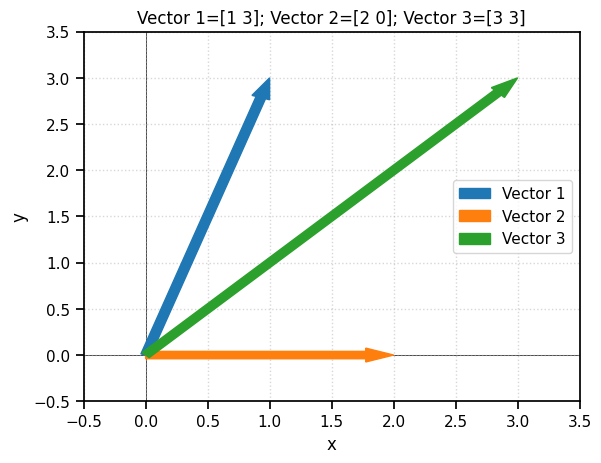

In [14]:
plot_vectors([a.reshape(-1), b.reshape(-1), c.reshape(-1)])

### 1.5

Scale $\vec{a}$ by 3.2 and $\vec{b}$ by -4. Plot the results.

<Axes: title={'center': 'Vector 1=[3.2 9.6]; Vector 2=[-8  0]; Vector 3=[3 3]'}, xlabel='x', ylabel='y'>

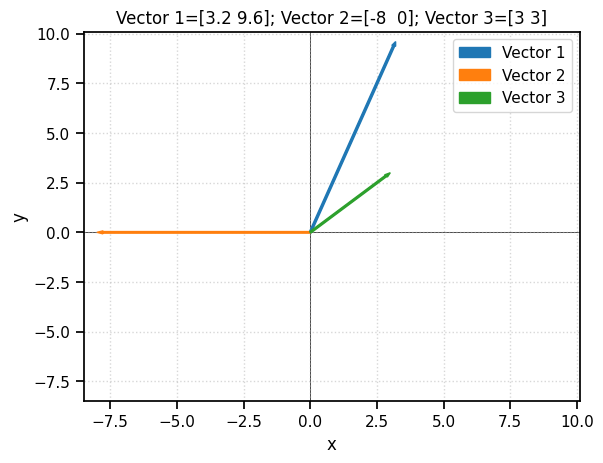

In [15]:
plot_vectors([3.2 * a.reshape(-1), -4 * b.reshape(-1), c.reshape(-1)])

### 1.6

Now scale $\vec{a}$ and $\vec{b}$ to be of unit length. Plot the resulting vectors.

<Axes: title={'center': 'Vector 1=[0.31622777 0.9486833 ]; Vector 2=[1. 0.]'}, xlabel='x', ylabel='y'>

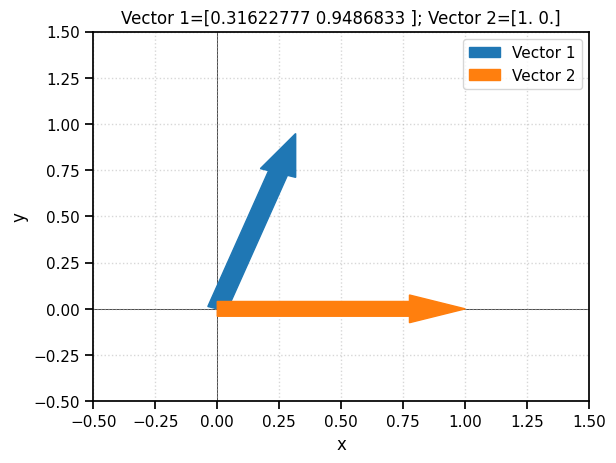

In [23]:
a_hat = a / mag(a)
b_hat = b / mag(b)
plot_vectors([a_hat.reshape(-1), b_hat.reshape(-1)])

### 1.5

Set $\vec{a} = \begin{bmatrix}1 \\ 3\end{bmatrix}$ and $\vec{b} = \begin{bmatrix}2 \\ 0\end{bmatrix}$ again.

Subtract the vector $\vec{b}$ from $\vec{a}$ to create a new vector $\vec{d}$. Now plot $\vec{a}$, $-\vec{b}$, and $\vec{d}$.

<Axes: title={'center': 'Vector 1=[1 3]; Vector 2=[-2  0]; Vector 3=[-1  3]'}, xlabel='x', ylabel='y'>

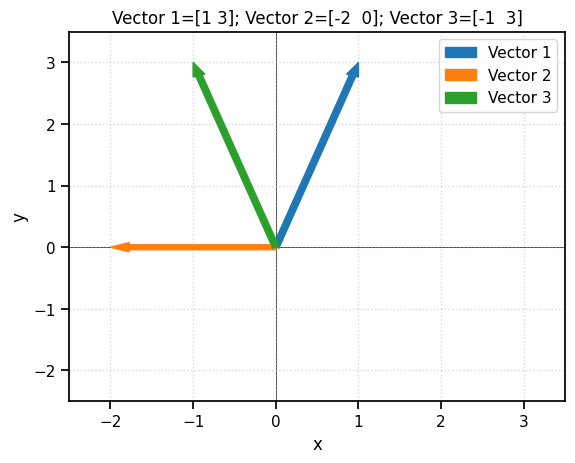

In [24]:
d = a - b

plot_vectors([
    a.reshape(-1),
    -b.reshape(-1),
    d.reshape(-1)
])

### 1.6

Compute the dot product between $\vec{a}$ and $\vec{b}$. Do you expect this result to be negative, positive, or 0?

In [27]:
print(a.T @ b)

[[2]]


### 1.7

Judging from **1.4** and **1.6**, it seems that $\vec{a}$ and $\vec{b}$ are not quite orthogonal. We'd like to make it so that they are. How can we modify $\vec{a}$ to make it orthogonal to $\vec{b}$?

_Hint: We will need to use vector projection (slide 20) and subtraction._

Plot $\vec{a}$, $\vec{b}$, and the orthogonalized version of $\vec{a}$ that you computed ($\vec{a}_{orth}$)


<Axes: title={'center': 'Vector 1=[0.        0.9486833]; Vector 2=[1. 0.]'}, xlabel='x', ylabel='y'>

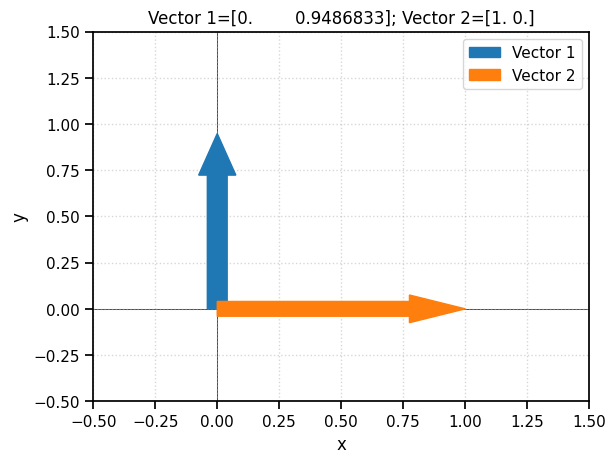

In [45]:
proj_a_b = (a_hat.T @ b_hat)/(mag(b_hat) ** 2) * b_hat
a_orth = a_hat - proj_a_b
plot_vectors([a_orth.reshape(-1), b_hat.reshape(-1)])

# 2 Matrices

### 2.1
Consider the following vectors:
$\vec{v} = \begin{bmatrix}3 \\ 4\end{bmatrix}$ , $\vec{w} = \begin{bmatrix}-4.89 \\ 1.06\end{bmatrix}$.

Check that their magnitude is equal and plot them to see what they look like.

Define a function that computes the angle between two vectors, and use it to compute the angle between these two.

_Hint: Use the definition of the dot product._

<Axes: title={'center': 'Vector 1=[3 4]; Vector 2=[-4.89  1.06]'}, xlabel='x', ylabel='y'>

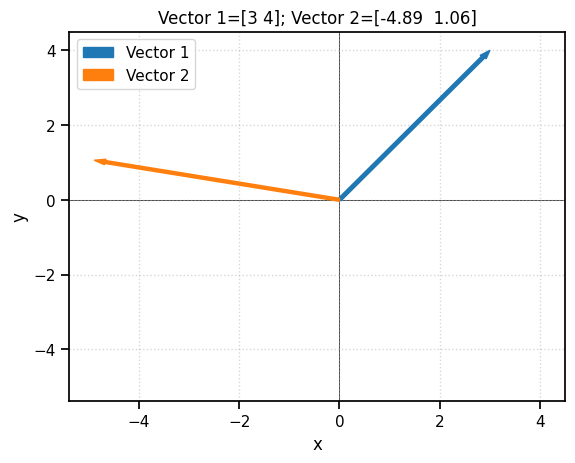

In [56]:
v = np.array([3, 4]).reshape(-1, 1)
w = np.array([-4.89, 1.06]).reshape(-1, 1)

plot_vectors([v.reshape(-1), w.reshape(-1)])

In [58]:
def vect_angle(v: np.ndarray, w: np.ndarray) -> np.ndarray:
    return np.degrees(np.arccos((v.T @ w) / (mag(v) * mag(w))))

vect_angle(v, w)

array([[114.63917931]])

### 2.2
What matrix $\bf{A}$ can you use to transform $\vec{v}$ into $\vec{w}$? Construct such a matrix and plot your results.

_Note: In numpy, to multiply a matrix `A` by a vector `v`, we use `@`: `A @ v`._

### 2.2a

Let's visualize the linear transformation your matrix performed, on more than one vector. The following function, `visualize_matrix(matrix)`, visualizes how a random set of points in $\mathbb{R}^2$ are transformed when passed through the provided matrix `matrix`.

In [ ]:
def visualize_matrix(matrix, npoints=100):
    """
    Visualizes the linear transformation a matrix performs on 2D space.

    Parameters
    ----------
    matrix : np.ndarray of shape (2,2)
        The matrix to be visualized
    npoints : int
        The number of random points to generate in R2
    """
    # Generate 100 random 2D points around the origin
    points = np.random.randn(2, npoints)

    # Apply the transformation matrix
    transformed_points = np.dot(matrix, points)

    # Create the plot
    plt.figure(figsize=(6, 6))

    # Plot lines from original points to transformed points
    for i in range(100):
        plt.plot([points[0, i], transformed_points[0, i]],
                 [points[1, i], transformed_points[1, i]],
                 color='lightcoral', alpha=0.7, lw=1.2)

    # Plot the end points as blue dots
    plt.scatter(-100, -100, color='blue', s=30, zorder=3, label='End points')
    plt.scatter(transformed_points[0], transformed_points[1], color='blue', s=30, zorder=3)

    # Add a text box showing the matrix
    matrix_text = f"M =\n[{matrix[0, 0]:.2f}, {matrix[0, 1]:.2f}]\n[{matrix[1, 0]:.2f}, {matrix[1, 1]:.2f}]"
    plt.text(0.05, 0.95, matrix_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    # Set plot limits and aspect ratio
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.gca().set_aspect('equal', adjustable='box')

    # Add grid, legend
    plt.legend()
    plt.grid(linestyle=':', alpha=0.5)

    # Show the plot
    plt.show()
    return ax

### 2.3

Write a function which returns the 2D rotation matrix for any $\theta$ you provide. Verify that you can rotate the vector $\begin{bmatrix}1 \\ 0\end{bmatrix}$ by $\pi/2$ (90 degrees) counter-clockwise, and clockwise.

### 2.4

You're handed the vector $\begin{bmatrix}2 \\ 0\end{bmatrix}$ and told that you need to triple its length along the x-axis, using the fanciest new matrix cooked up at Google DeepMind: $\bf{B}(k) = \begin{bmatrix}1 & 0 \\0 & k\end{bmatrix}$. You say, "But boss, this matrix only scales vectors along the y-component!" The boss is adamant that the company needs to use the latest advances in AI to stay competitive. You have to use the matrix.

---

What linear transformations do we need to perform such that the vector $\begin{bmatrix}2 \\ 0\end{bmatrix}$ is transformed into $\begin{bmatrix}6 \\ 0\end{bmatrix}$, while still using $\bf{B}(k)$?

Define the three matrices that you'll need to use, and explain what they do:

In [ ]:
## Licensed by Google DeepMind™
def B(k):
    return np.array([[1, 0], [0, k]])

### 2.5
Visualize each one of the matrices:

### 2.6

Now combine the 3 matrices into a single matrix, using the `@` symbol to matrix-multiply. Print out the result. Is it what you expect?

### 2.7

Verify that the matrix does what is intended by plotting the original and modified vector. Visualize the final matrix.

### 2.8

Construct a matrix that projects $\mathbb{R}^2$ onto the span of the vector $\begin{bmatrix}2.4 \\ 1.5\end{bmatrix}$